# Results analysis from BERT Model
### 230T2 - Megha Raveendran, Renee Reynolds, Derui Chen, Loïc Diridollou, Shiva Kandi

In [56]:
# importing the headlines data set
df = pd.read_csv('data.csv')
df.drop(['Unnamed: 0'], axis = 1, inplace = True)

# importing the results from the BERT model
df_res = pd.read_csv('probs.csv')

In [57]:
# checking on the size
df_res.shape, df.shape

((33658, 3), (33658, 4))

In [11]:
# including the results of BERT into our main dataframe
['label'] = df_res['1']

In [23]:
df.Date = pd.to_datetime(df.Date)

In [24]:
new_df = df.resample('3D', on = 'Date').max()

In [29]:
new_df = df.resample('D', on='Date').mean().fillna(method = 'ffill')
new_dff = new_df[new_df.index >= dt.datetime(2012, 1, 1)]

In [34]:
tickers = ['^GSPC']

# We would like all available data from 01/01/2000 until 12/31/2016.
start_date = '2013-01-01'
end_date = '2013-11-20'

# User pandas_reader.data.DataReader to load the desired data. As simple as that.
panel_data = data.DataReader('^GSPC', 'yahoo', start_date, end_date)

In [62]:
dff = new_dff.merge(panel_data[['Close']], how = 'right', left_on = new_dff.index, right_on = panel_data[['Close']].index)
dff.set_index('key_0', inplace = True)
y = dff['Close'].values

# parameters to modify to create the moving average: k
k = 5
dff = dff.fillna(method = 'ffill').rolling(k).mean()
dff.dropna(inplace = True)

In [63]:
# choosing only the values in the second test set (2013 only)
dff = dff.loc['2013-01-02':]
np.corrcoef(dff['label'], y[-len(dff):])

array([[1.       , 0.2549246],
       [0.2549246, 1.       ]])

Text(0.5, 1.0, 'Sentiment as a function of index level')

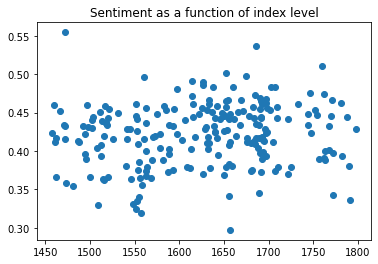

In [51]:
plt.scatter(dff['Close'].values, dff['label'].values)
plt.title("Sentiment as a function of index level")

In [40]:
# regression of the index level on the sentiment value
# trying to prove significancy
X = dff['label']
Y = dff['Close']
model = sm.OLS(Y,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Close   R-squared (uncentered):                   0.989
Model:                            OLS   Adj. R-squared (uncentered):              0.989
Method:                 Least Squares   F-statistic:                          2.087e+04
Date:                Tue, 15 Sep 2020   Prob (F-statistic):                   4.54e-223
Time:                        13:25:57   Log-Likelihood:                         -1471.6
No. Observations:                 225   AIC:                                      2945.
Df Residuals:                     224   BIC:                                      2949.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
label       3818.2139     26.432    144.455      0.000    3766.127    3870.301
==============================================================================
Omnibus:                        4.107   Durbin-Watson:                   1.506
Prob(Omnibus):                  0.128   Jarque-Bera (JB):                4.686
Skew:                           0.128   Prob(JB):                       0.0960
Kurtosis:                       3.659   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [41]:
results.pvalues

label    4.535607e-223
dtype: float64

Text(0.5, 1.0, 'Correlation between sentimental factor and index level')

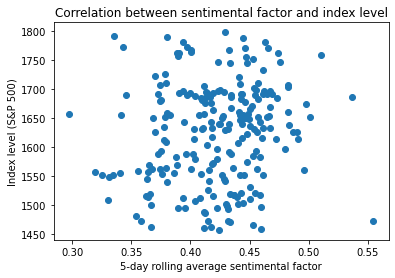

In [42]:
plt.scatter(dff['label'], Y)
plt.xlabel("5-day rolling average sentimental factor")
plt.ylabel("Index level (S&P 500)")
plt.title("Correlation between sentimental factor and index level")

Text(0.5, 1.0, 'Return as a function of sentiment')

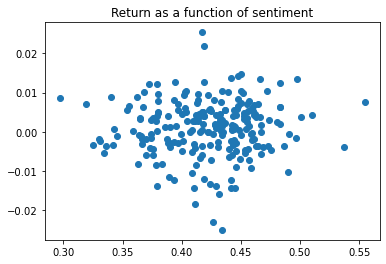

In [50]:
plt.scatter(dff['label'], dff['Return'])
plt.title("Return as a function of sentiment")

Text(0.5, 1.0, 'Plot of the sentiment over time')

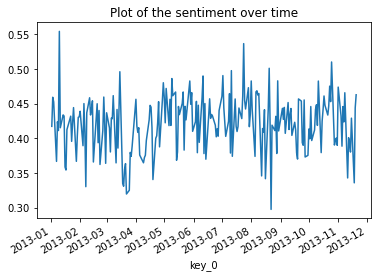

In [49]:
#panel_data.loc['2012-01-02':]['Close']
dff['label'].plot()
plt.title("Plot of the sentiment over time")

# Second part: results

In [56]:
# importing the headlines data set
df = pd.read_csv('data.csv')
df.drop(['Unnamed: 0'], axis = 1, inplace = True)

# importing the results from the BERT model
df_res = pd.read_csv('probs.csv')

In [57]:
# checking on the size
df_res.shape, df.shape

((33658, 3), (33658, 4))

In [11]:
# including the results of BERT into our main dataframe
['label'] = df_res['1']

In [23]:
df.Date = pd.to_datetime(df.Date)

In [24]:
new_df = df.resample('3D', on = 'Date').max()

In [29]:
new_df = df.resample('D', on='Date').mean().fillna(method = 'ffill')
new_dff = new_df[new_df.index >= dt.datetime(2012, 1, 1)]

In [34]:
tickers = ['^GSPC']

# We would like all available data from 01/01/2000 until 12/31/2016.
start_date = '2013-01-01'
end_date = '2013-11-20'

# User pandas_reader.data.DataReader to load the desired data. As simple as that.
panel_data = data.DataReader('^GSPC', 'yahoo', start_date, end_date)

In [62]:
dff = new_dff.merge(panel_data[['Close']], how = 'right', left_on = new_dff.index, right_on = panel_data[['Close']].index)
dff.set_index('key_0', inplace = True)
y = dff['Close'].values

# parameters to modify to create the moving average: k
k = 5
dff = dff.fillna(method = 'ffill').rolling(k).mean()
dff.dropna(inplace = True)

In [63]:
# choosing only the values in the second test set (2013 only)
dff = dff.loc['2013-01-02':]
np.corrcoef(dff['label'], y[-len(dff):])

array([[1.       , 0.2549246],
       [0.2549246, 1.       ]])

Text(0.5, 1.0, 'Sentiment as a function of index level')

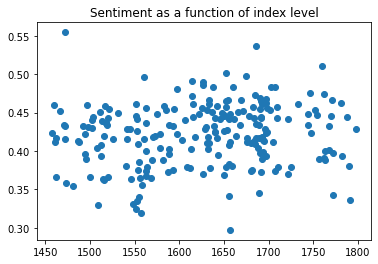

In [51]:
plt.scatter(dff['Close'].values, dff['label'].values)
plt.title("Sentiment as a function of index level")

In [40]:
# regression of the index level on the sentiment value
# trying to prove significancy
X = dff['label']
Y = dff['Close']
model = sm.OLS(Y,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Close   R-squared (uncentered):                   0.989
Model:                            OLS   Adj. R-squared (uncentered):              0.989
Method:                 Least Squares   F-statistic:                          2.087e+04
Date:                Tue, 15 Sep 2020   Prob (F-statistic):                   4.54e-223
Time:                        13:25:57   Log-Likelihood:                         -1471.6
No. Observations:                 225   AIC:                                      2945.
Df Residuals:                     224   BIC:                                      2949.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
label       3818.2139     26.432    144.455      0.000    3766.127    3870.301
==============================================================================
Omnibus:                        4.107   Durbin-Watson:                   1.506
Prob(Omnibus):                  0.128   Jarque-Bera (JB):                4.686
Skew:                           0.128   Prob(JB):                       0.0960
Kurtosis:                       3.659   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [41]:
results.pvalues

label    4.535607e-223
dtype: float64

Text(0.5, 1.0, 'Correlation between sentimental factor and index level')

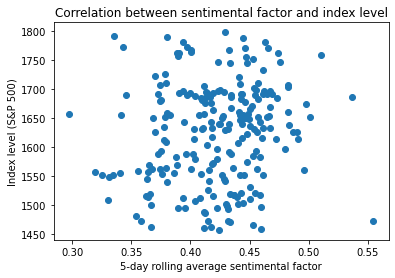

In [42]:
plt.scatter(dff['label'], Y)
plt.xlabel("5-day rolling average sentimental factor")
plt.ylabel("Index level (S&P 500)")
plt.title("Correlation between sentimental factor and index level")

Text(0.5, 1.0, 'Return as a function of sentiment')

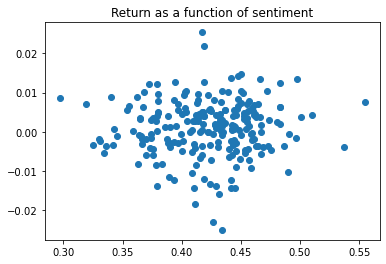

In [50]:
plt.scatter(dff['label'], dff['Return'])
plt.title("Return as a function of sentiment")

Text(0.5, 1.0, 'Plot of the sentiment over time')

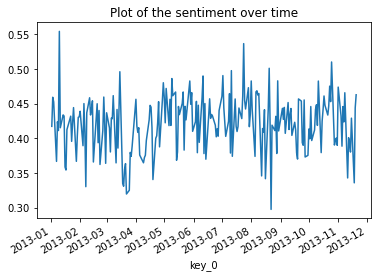

In [49]:
#panel_data.loc['2012-01-02':]['Close']
dff['label'].plot()
plt.title("Plot of the sentiment over time")

# Second part: results

In [56]:
# importing the headlines data set
df = pd.read_csv('data.csv')
df.drop(['Unnamed: 0'], axis = 1, inplace = True)

# importing the results from the BERT model
df_res = pd.read_csv('probs.csv')

In [57]:
# checking on the size
df_res.shape, df.shape

((33658, 3), (33658, 4))

In [11]:
# including the results of BERT into our main dataframe
['label'] = df_res['1']

In [23]:
df.Date = pd.to_datetime(df.Date)

In [24]:
new_df = df.resample('3D', on = 'Date').max()

In [29]:
new_df = df.resample('D', on='Date').mean().fillna(method = 'ffill')
new_dff = new_df[new_df.index >= dt.datetime(2012, 1, 1)]

In [34]:
tickers = ['^GSPC']

# We would like all available data from 01/01/2000 until 12/31/2016.
start_date = '2013-01-01'
end_date = '2013-11-20'

# User pandas_reader.data.DataReader to load the desired data. As simple as that.
panel_data = data.DataReader('^GSPC', 'yahoo', start_date, end_date)

In [62]:
dff = new_dff.merge(panel_data[['Close']], how = 'right', left_on = new_dff.index, right_on = panel_data[['Close']].index)
dff.set_index('key_0', inplace = True)
y = dff['Close'].values

# parameters to modify to create the moving average: k
k = 5
dff = dff.fillna(method = 'ffill').rolling(k).mean()
dff.dropna(inplace = True)

In [63]:
# choosing only the values in the second test set (2013 only)
dff = dff.loc['2013-01-02':]
np.corrcoef(dff['label'], y[-len(dff):])

array([[1.       , 0.2549246],
       [0.2549246, 1.       ]])

Text(0.5, 1.0, 'Sentiment as a function of index level')

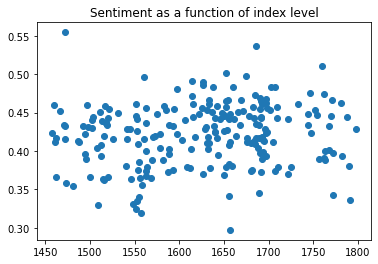

In [51]:
plt.scatter(dff['Close'].values, dff['label'].values)
plt.title("Sentiment as a function of index level")

In [40]:
# regression of the index level on the sentiment value
# trying to prove significancy
X = dff['label']
Y = dff['Close']
model = sm.OLS(Y,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Close   R-squared (uncentered):                   0.989
Model:                            OLS   Adj. R-squared (uncentered):              0.989
Method:                 Least Squares   F-statistic:                          2.087e+04
Date:                Tue, 15 Sep 2020   Prob (F-statistic):                   4.54e-223
Time:                        13:25:57   Log-Likelihood:                         -1471.6
No. Observations:                 225   AIC:                                      2945.
Df Residuals:                     224   BIC:                                      2949.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
label       3818.2139     26.432    144.455      0.000    3766.127    3870.301
==============================================================================
Omnibus:                        4.107   Durbin-Watson:                   1.506
Prob(Omnibus):                  0.128   Jarque-Bera (JB):                4.686
Skew:                           0.128   Prob(JB):                       0.0960
Kurtosis:                       3.659   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [41]:
results.pvalues

label    4.535607e-223
dtype: float64

Text(0.5, 1.0, 'Correlation between sentimental factor and index level')

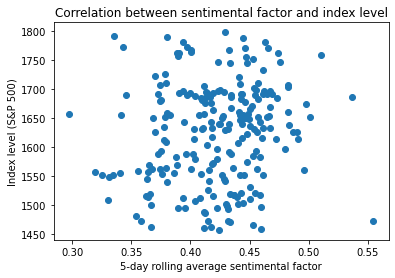

In [42]:
plt.scatter(dff['label'], Y)
plt.xlabel("5-day rolling average sentimental factor")
plt.ylabel("Index level (S&P 500)")
plt.title("Correlation between sentimental factor and index level")

Text(0.5, 1.0, 'Return as a function of sentiment')

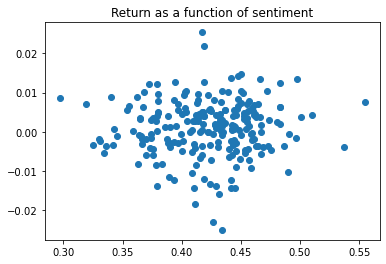

In [50]:
plt.scatter(dff['label'], dff['Return'])
plt.title("Return as a function of sentiment")

Text(0.5, 1.0, 'Plot of the sentiment over time')

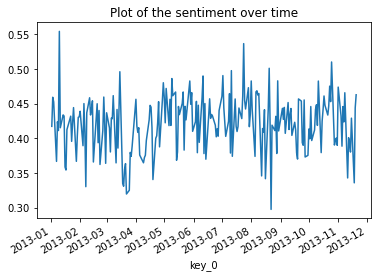

In [49]:
#panel_data.loc['2012-01-02':]['Close']
dff['label'].plot()
plt.title("Plot of the sentiment over time")